# Predicting

## First

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [33]:
tips=sns.load_dataset('tips')

In [34]:
x=tips[['total_bill','size']]
y=(tips['smoker'])

In [35]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [36]:
X_train, X_test, y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=42)

In [37]:
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [38]:
y_pred=model.predict(X_test)

In [39]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[45,  2],
       [21,  6]])

<Axes: >

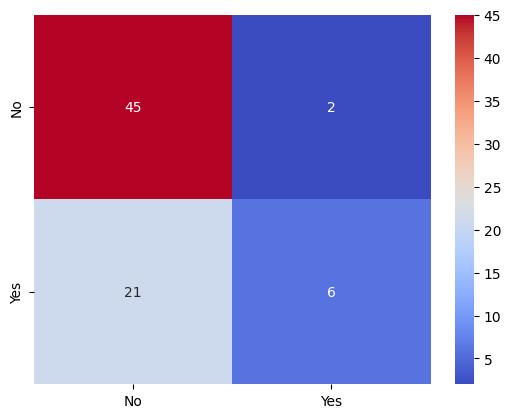

In [40]:
sns.heatmap(cm,annot=True,fmt='d',cmap='coolwarm',
            xticklabels=le.classes_,
            yticklabels=le.classes_)

## Second

In [41]:
a=tips[['total_bill','size']]
b=(tips['sex'])

In [42]:
la=LabelEncoder()
b=la.fit_transform(b)

In [43]:
x_train, x_test, y_train, y_test=train_test_split(a,b,test_size=0.2,random_state=42)

In [44]:
modele=LogisticRegression()
modele.fit(x_train,y_train)

LogisticRegression()

In [45]:
ypred=modele.predict(x_test)

In [46]:
cm=confusion_matrix(y_test,ypred)
cm

array([[ 0, 19],
       [ 0, 30]])

<Axes: >

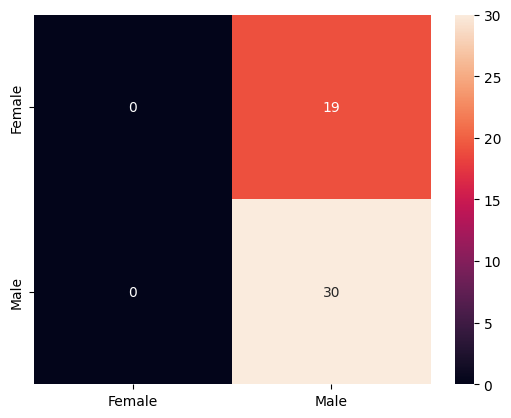

In [47]:
sns.heatmap(cm,annot=True,fmt='d',cmap='rocket',
            xticklabels=la.classes_,
            yticklabels=la.classes_)

In [48]:
sns.load_dataset('penguins')

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


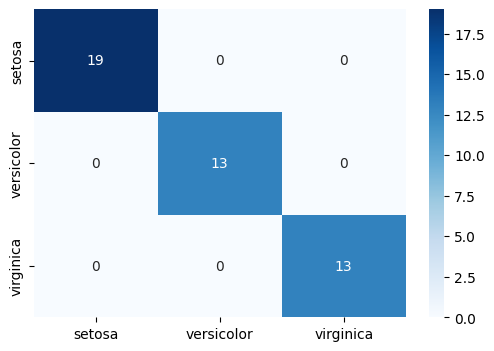

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

iris=sns.load_dataset('iris')
X=iris[['sepal_length','sepal_width','petal_length','petal_width']]
y=iris['species']

le=LabelEncoder()
y=le.fit_transform(y)

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

model=LogisticRegression()
model.fit(X_train,y_train)

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True,fmt='d',cmap='Blues',xticklabels=le.classes_,yticklabels=le.classes_)
plt.show()

# Plotting ROC Curve

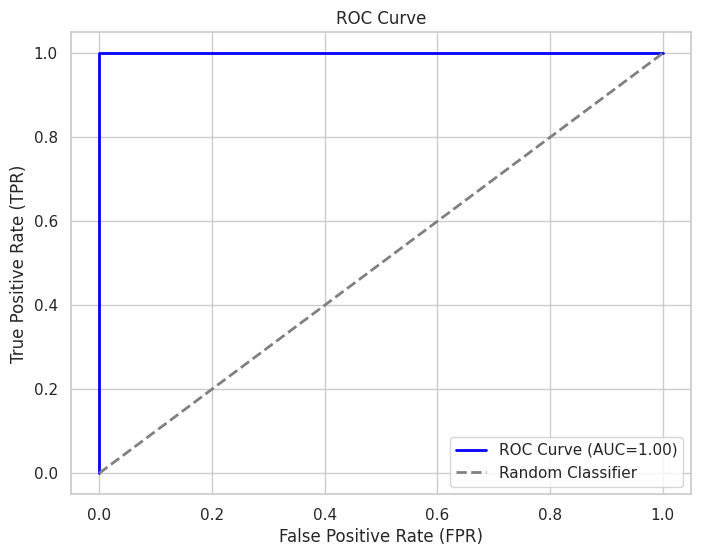

In [50]:
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

iris=load_iris()
X=iris.data
y=(iris.target == 2).astype(int)

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

model=LogisticRegression()
model.fit(X_train,y_train)

y_probs=model.predict_proba(X_test)[:,1]

fpr,tpr,thresholds=roc_curve(y_test,y_probs)
auc_score=roc_auc_score(y_test,y_probs)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color="blue",lw=2,label=f"ROC Curve (AUC={auc_score:.2f})")
plt.plot([0,1],[0,1],color="gray",lw=2,linestyle="--",label="Random Classifier")
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.show()

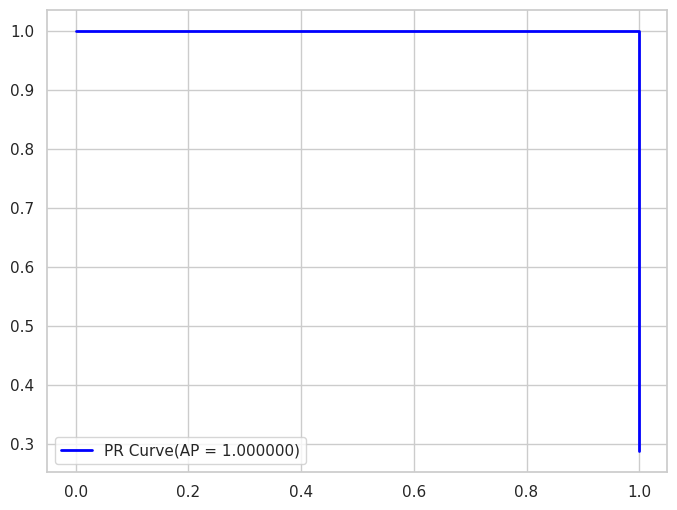

In [53]:
import numpy as np
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import precision_recall_curve,average_precision_score
import matplotlib.pyplot as plt

iris = load_iris()
X = iris.data
y = (iris.target == 2).astype(int)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=42)

model = LogisticRegression(random_state=42)
model.fit(X_train,y_train)

y_probs = model.predict_proba(X_test)[:,1]

precision,recall,thresholds = precision_recall_curve(y_test,y_probs)
average_precision = average_precision_score(y_test,y_probs)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(8,6))
plt.plot(recall,precision,label=f'PR Curve(AP = {average_precision:2f})',color='blue',lw=2)
plt.legend(loc='lower left')
plt.show()